#Lista 1: Um pouco mais sobre CDFs, BoxPlots, histogramas...

## Forma de entrega

Salve essa página (com código e respostas geradas) em ``.pdf`` e submeta o documento na atividade do AVA (apenas um integrante do grupo deve fazer a submissão).

## Grupos

* **Graduação:** grupo de até 3 pessoas
* **Pós-Graduação:** individual

## Integrantes do grupo

1. **Nome(s):** Gabrielly Barcelos Cariman

2. **Matrícula(s):** 2022101409

3. **E-mail(s) institucional(is):** gabrielly.cariman@edu.ufes.br

3. **Curso(s):** Engenharia de Computação

4. **Link do seu Colab com suas soluções (para que o professor possa acessar e rodar o código):** https://colab.research.google.com/drive/1011FEN49RLlaVFjpoi9efU8adNPUvHSx?usp=sharing

## Sobre a Avaliação

Todas questões têm o mesmo peso/valor.

## Questão 1

O objetivo desta questão é comparar as **Funções de Distribuição** (i.e., CDF) teórica e empírica de algumas distribuições contínuas bem conhecidas.

Lembre-se que nós conversamos um pouco sobre CDFs na Aula 3.

### Exemplo

Vamos começar com um exemplo sobre a distribuição Uniforme contínua.

A biblioteca ``scipy`` possui funcionalidades para gerar números pseudo-aleatórios e para computar valores da CDF teórica da distribuição. Leia mais sobre em https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html.

A biblioteca ``statsmodels`` possui funcionalidades para computar a CDF empírica de um conjunto de observações.

In [35]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [36]:
def plot_uniform_cdf(loc, scale, n):
  # gera 'n' números de uma distribuição uniforme contínua no
  # intervalo [loc, loc + scale]
  r = uniform.rvs(loc = loc, scale = scale, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição contínua uniforme no intervalo
  # [loc, loc + scale]
  plt.plot(cdf.x, uniform.cdf(cdf.x, loc = loc, scale = scale),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

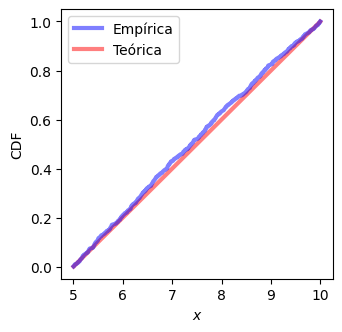

In [37]:
plot_uniform_cdf(5, 5, 1000)

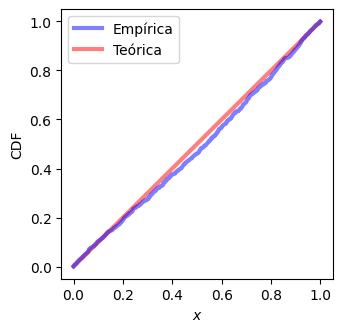

In [38]:
plot_uniform_cdf(0, 1, 1000)

### Parte (*a*)

Repita a análise acima para a distribuição normal. Lembre-se que a distribuição normal possui dois parâmetros: $\mu$ e $\sigma$.

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição normal.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição normal;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [39]:
from scipy.stats import norm

In [40]:
def plot_normal_cdf(mu, sigma, n):
  r = norm.rvs(loc = mu, scale = sigma, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição normal no intervalo
  row = norm.cdf(cdf.x, loc = mu, scale = sigma)
  plt.plot(cdf.x, row,
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

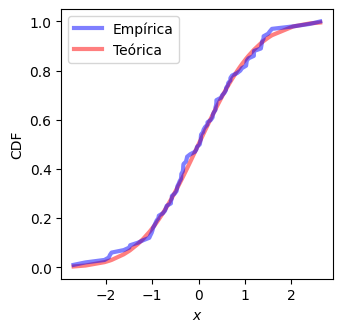

In [41]:
plot_normal_cdf(0, 1, 100)

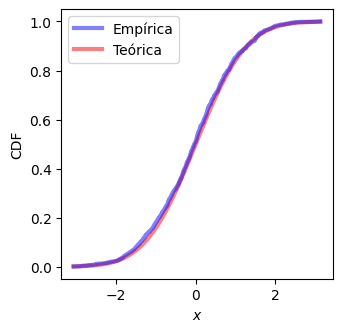

In [42]:
plot_normal_cdf(0, 1, 1000)

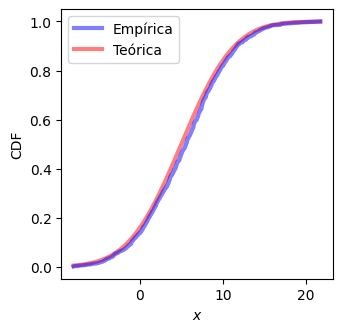

In [43]:
plot_normal_cdf(5, 5, 1000)

### Parte (*b*)

Repita a análise inicial para a distribuição exponencial. Lembre-se, dado um parâmetro $\lambda > 0$, a densidade da distribuição exponencial é:
$$f(x) = \lambda e^{-\lambda x}\text{, } x > 0.$$

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição exponencial.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição exponencial;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

**ATENÇÃO:** Leia com atenção a documentação da biblioteca mencionada para entender como o parâmetro $\lambda$ deve ser fornecido. O $\lambda$ da definição acima não é o mesmo que o `scale` da biblioteca.

In [44]:
from scipy.stats import expon

In [45]:
def plot_exponential_cdf(lambda_, n):
  scale = 1 / lambda_
  r = expon.rvs(scale = scale, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição exponencial no intervalo
  row = expon.cdf(cdf.x, scale = scale)
  plt.plot(cdf.x, row,
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

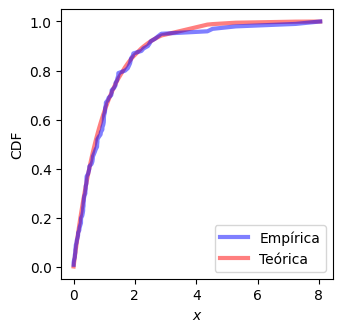

In [46]:
plot_exponential_cdf(1, 100)

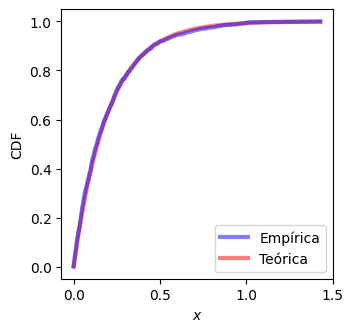

In [47]:
plot_exponential_cdf(5, 1000)


### Parte (*c*)

Agora as coisas ficam mais interessantes...

Repita a análise inicial para a distribuição de pareto. Lembre-se, dado um parâmetro $b > 0$, a densidade da distribuição de pareto é:
$$f(x) = \frac{b}{x^{b+1}}\text{, } x \ge 1.$$

Consulte https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_pareto.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição de pareto.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição de pareto;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [48]:
from scipy.stats import pareto

In [49]:
def plot_pareto_cdf(b, n):
  r = pareto.rvs(b, size=n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição pareto no intervalo
  row = pareto.cdf(cdf.x, b)
  plt.plot(cdf.x, row,
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

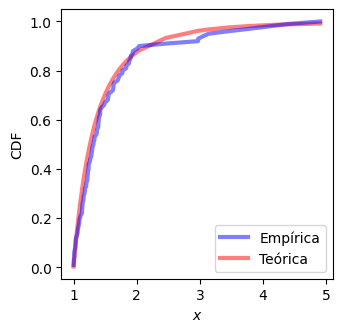

In [50]:
plot_pareto_cdf(3, 100)

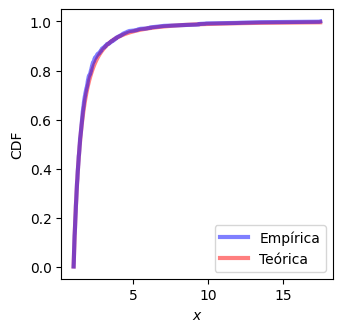

In [51]:
plot_pareto_cdf(2, 1000)

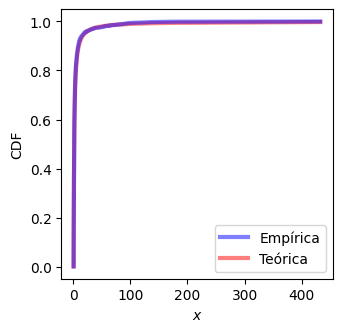

In [52]:
plot_pareto_cdf(1, 1000)

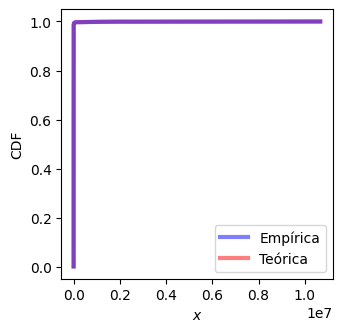

In [53]:
plot_pareto_cdf(0.5, 1000)

Após fazer as figuras, você provavelmente observou que para valores pequenos de $b$, a CDF da distribuição de pareto é bastante difícil de ler, uma vez que fica praticamente "colada" às retas $x = 0$ e $y = 1$.

Esse fenômeno ocorre porque, quando $b$ é pequeno, valores muito grandes (i.e., discrepantes ou *outliers*) têm uma probabilidade não negligível de ocorrerem.

Quando observamos o comportamento das figuras acima, devemos modificar a forma de visualizar a distribuição:
1. Devemos gerar uma figura para a CCDF (*Complementary Cumulative Distribution Function*). A CCDF de um valor $x$ é definida como 1 menos a CDF de $x$.
2. Devemos colocar os eixos $x$ e $y$ em escala logarítmica.

Complete a função abaixo para gerar a figura da forma descrita acima e gere os gráficos para os mesmos casos que testou anteriormente.

In [54]:
def plot_pareto_ccdf(b, n):
  r = pareto.rvs(b, size=n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  ccdf = 1 - cdf.y
  plt.loglog(cdf.x, ccdf, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição pareto no intervalo
  row = pareto.cdf(cdf.x, b)
  row_ccdf = 1 - row
  plt.loglog(cdf.x, row_ccdf,
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CCDF (log)');
  plt.gcf().set_size_inches(3.5, 3.5)

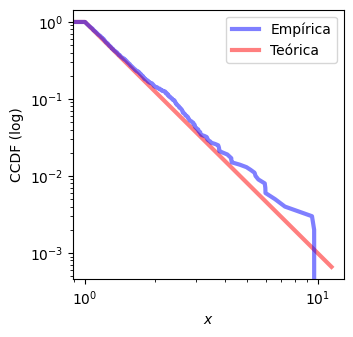

In [55]:
plot_pareto_ccdf(3, 1000)

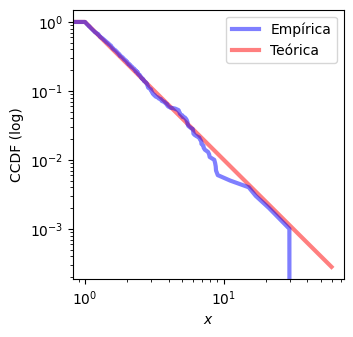

In [56]:
plot_pareto_ccdf(2, 1000)

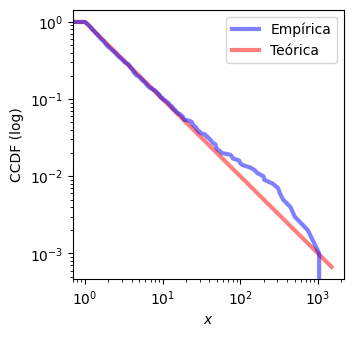

In [57]:
plot_pareto_ccdf(1, 1000)

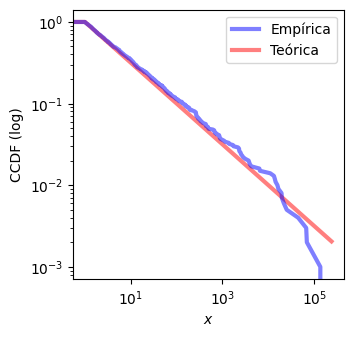

In [58]:
plot_pareto_ccdf(0.5, 1000)

## Questão 2

Esta questão é **obrigatória** apenas para alunos da **pós-graduação**.

O objetivo desta questão é entender o comportamento da **parte (*c*)** da questão anterior.

Você deve ler as duas primeiras seções do artigo https://arxiv.org/pdf/cond-mat/0412004.pdf e fazer um resumo (de no máximo uma página). Certifique-se de incluir no seu resumo, entre outras informações que achar relevantes, o motivo de a CCDF da distribuição de pareto ter a forma que tem quando ambos os eixos estão em escala logarítmica.

## Questão 3

Primeiro, você deve ler os artigos abaixo.
1. [Common pitfalls in statistical analysis: The use of correlation techniques](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079093/)
2. [Chocolate Consumption, Cognitive Function,
and Nobel Laureates](https://utw10426.utweb.utexas.edu/quest/Q7/choco.pdf)

Resumindo o que foi lido nos artigos, responda as seguintes questões:

1. O que é o coeficiente de correlação?
2. Quando o coeficiente de correlação é útil e quando ele pode ser a ferramenta errada para analisar a relação entre duas variáveis?
3. Qual a diferença entre causalidade e correlação?

**Observação 1:** é esperado que a resposta das três perguntas utilize aproximadamente duas páginas A4.

**Observação 2:** você pode consultar outras fontes para responder as questões acima. No entanto, é esperado que as respostas sejam no contexto do conteúdo dos artigos.

**1. O que é o coeficiente de correlação?**

O coeficiente de correlação é uma medida estatística que avalia a força e a direção da relação entre duas variáveis. Ele varia de -1 a +1 e é usado para determinar se e como essas variáveis estão relacionadas. O coeficiente de correlação pode ser positivo, negativo ou zero, dependendo da natureza da relação entre as variáveis:

Correlação positiva ( > 0): Isso significa que, à medida que os valores de uma variável aumentam, os valores da outra variável também aumentam. Essas variáveis têm uma relação direta e positiva.

Correlação negativa ( < 0): Isso significa que, à medida que os valores de uma variável aumentam, os valores da outra variável diminuem. Essas variáveis têm uma relação inversa e negativa.

Correlação zero ( = 0): Isso significa que não existe uma relação linear aparente entre as variáveis. Elas não estão relacionadas de forma linear.

O valor absoluto do coeficiente de correlação (em módulo) indica a força da relação. Quanto mais próximo o valor estiver de 1, mais forte é a correlação. Quanto mais próximo de 0, mais fraca é a correlação.

Além disso, o quadrado do coeficiente de correlação representa a proporção da variação em uma variável que pode ser explicada pela variação na outra variável. Isto é, mostra a quantidade de variação compartilhada entre as duas variáveis.

**2. Quando o coeficiente de correlação é útil e quando ele pode ser a ferramenta errada para analisar a relação entre duas variáveis?**

O coeficiente de correlação é útil quando se deseja avaliar a relação linear entre duas variáveis contínuas, quando existe relação linear entre as duas variáveis.

O coeficiente de correlação pode ser a ferramenta errada para analisar quando os dados têm relacionamentos não lineares, outliers, subgrupos distintos, ou quando uma das variáveis é ordinal em vez de contínua.

**3. Qual a diferença entre causalidade e correlação?**

A correlação é a uma relação estatística entre duas variáveis, onde a variação em uma variável está associada à variação na outra variável. Ela não implica uma relação de causa e efeito entre as variáveis. Por isso, se duas variáveis estão correlacionadas, não significa que uma está causando a outra. A correlação pode ser medida quantitativamente usando coeficientes de correlação. E ela pode ser positiva, negativa ou nula. A correlação pode identificar associações entre variáveis, mas não pode provar uma relação de causa e efeito.

A causalidade é uma relação na qual uma variável causa um efeito ou influencia o comportamento de outra variável. Ela requer evidências sólidas e rigorosas e não apenas ter uma elevada correlação entre duas variáveis, é necessário realizar estudos e experimentos. Para afirmar causalidade, é necessário comprovar que apenas a mudança em uma variável causa efetivamente a mudança na outra variável e que não há outras explicações para essa relação.

## Questão 4

Obtenha o conjunto de dados disponível no AVA da disciplina para essa questão. O conjunto de dados possui duas colunas: `type` e `score`. Você pode pensar nesses dados como sendo o resultados de medições (`score`) realizadas em um conjunto de objetos que pode ser de três tipos diferentes (`type`).

### Parte (a)

Leia o conjunto de dados e armazene-o em um `DataFrame` do `Pandas`.

In [59]:
import pandas as pd
df = pd.read_csv("dados_questao_4.csv", sep=",", encoding="UTF-8", header=0, dtype={"type": "category"})
df.head()

,score,type
0,0.023120,A
1,0.870633,A
2,-0.051788,A
3,0.490284,A
4,-0.296330,A


### Parte (b)

Usando a biblioteca `seaborn`, Faça o *BoxPlot* da variável `score` para todos os objetos, independentemente do tipo.

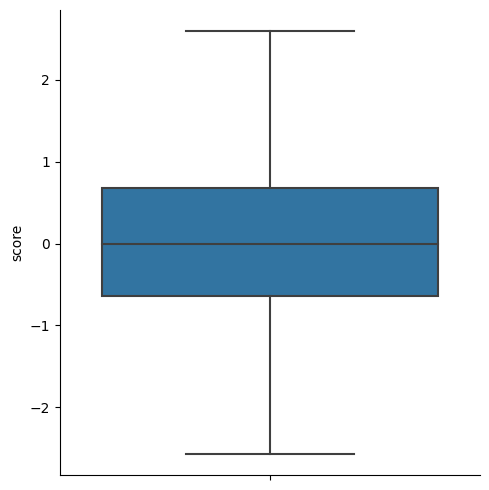

In [60]:
import seaborn as sns
sns.catplot(y="score", kind="box", data=df)

Agora, faça, em uma mesma figura, os *BoxPlots* para a variável `score` de acordo com a variável `type`. Isto é, um *BoxPlot* da variável `score` para cada valor de `type`. Novamente, use a biblioteca `seaborn`.

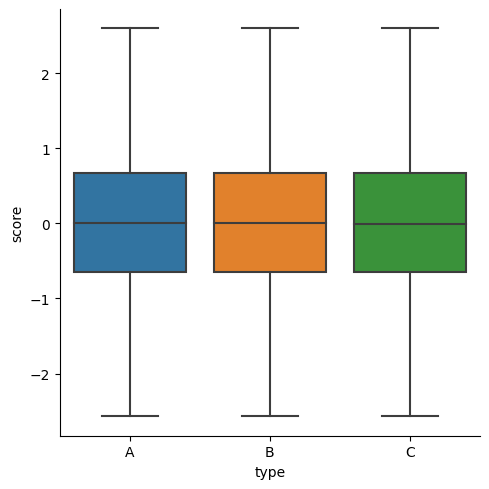

In [61]:
sns.catplot(x="type", y="score", kind="box", data=df)

Com base **apenas** nos *BoxPlots*, o que é possível afirmar sobre a dispersão/distribuição dos dados das três variáveis? Você diria que as três distribuições são similares?

Com base nos BoxPlots, as três variáveis têm distribuições de dados similares. As medianas das três variáveis estão localizadas no mesmo nível no gráfico, por isso, todas têm valores centrais semelhantes. A distância entre o primeiro quartil e o terceiro quartil é igual entre as três variáveis, por isso, a dispersão dos dados é semelhante. Não existem outliers extremos em nenhuma das três variáveis.


### Parte (c)

Agora:

1. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os histogramas.

2. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça as CDFs empíricas (vide Questão 1).

3. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os gráficos de Violino.



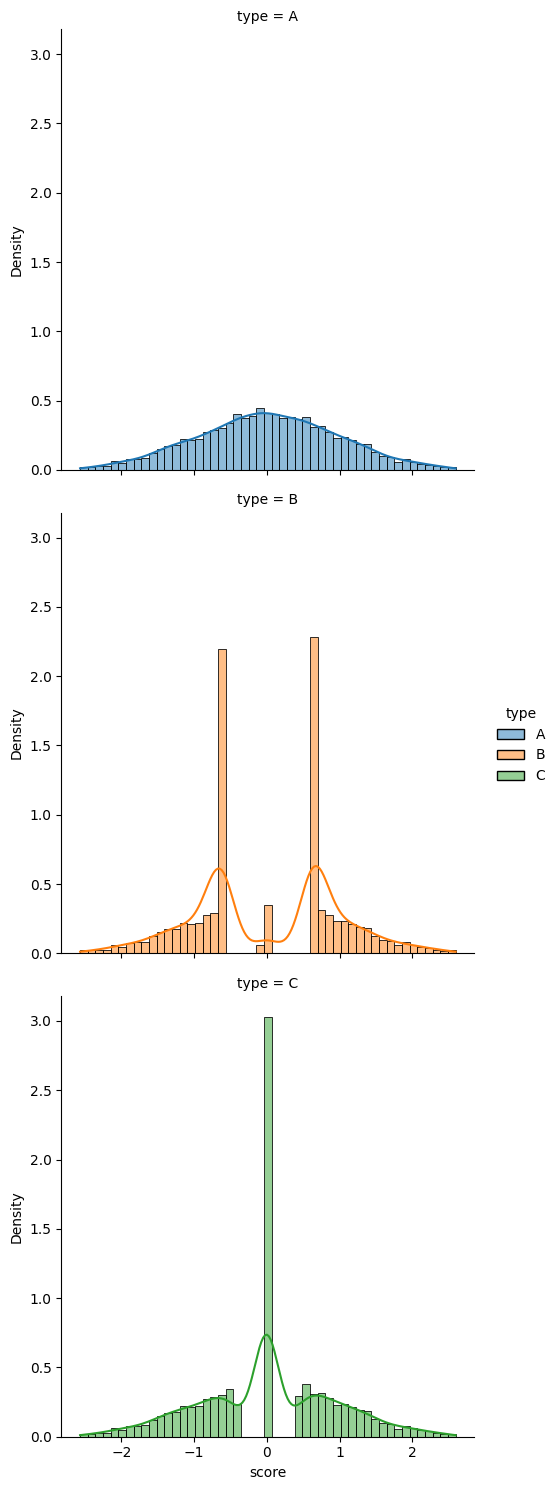

In [73]:
sns.displot(df, x="score", hue="type", row='type', stat="density", common_norm=False, kde=True)

In [63]:
def type_cdf_empirica(df: pd.DataFrame, type: str):
  cdf = ECDF(df.loc[df["type"]==type]["score"])
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue', label = f'Empírica; type={type}')
  plt.legend(loc = 'best');
  plt.xlabel("score");
  plt.ylabel("CDF");
  plt.gcf().set_size_inches(3.5, 3.5)

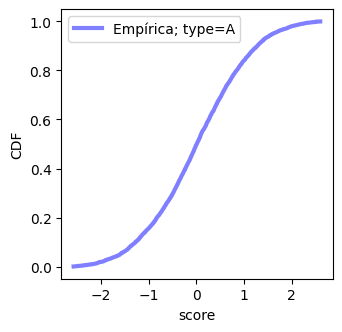

In [64]:
type_cdf_empirica(df, "A")

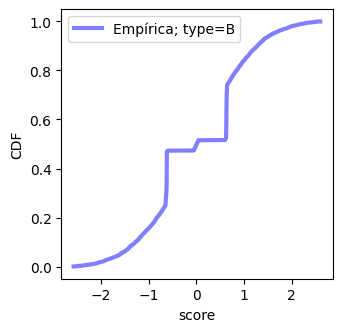

In [65]:
type_cdf_empirica(df, "B")

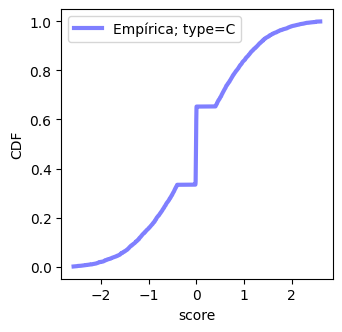

In [66]:
type_cdf_empirica(df, "C")

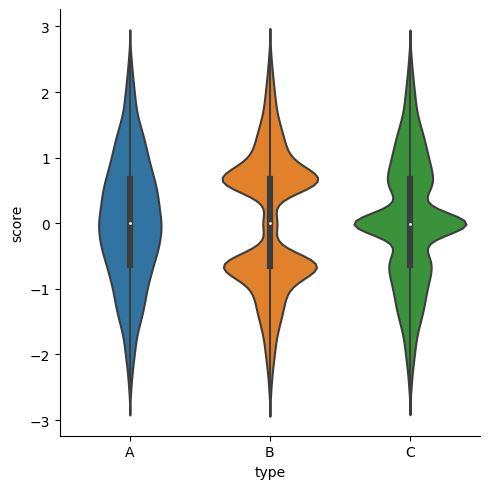

In [67]:
sns.catplot(x="type", y="score", kind="violin", data=df);

Revisitando a conclusão da Parte (b)...

Com base nessas novas figuras, o que é possível dizer sobre a dispersão/distribuição das três variáveis? Você diria que as três distribuições são similares?

Com base nas novas figuras, podemos observar que as distribuições das três variáveis (Tipo A, Tipo B e Tipo C) não são similares. Os scores variam de -3 a 3 em todos os conjuntos de dados, mas as características específicas de cada distribuição são distintas.

Para o Tipo A, é uma distribuição normal, com uma concentração maior de dados em torno de 0. A maior parte dos pontos está próxima de zero, formando uma distribuição mais simétrica.

Já o Tipo B tem uma distribuição bimodal. Ela também varia de -3 a 3, mas tem menos dados concentrados em torno de zero. Em vez disso, há uma dispersão maior de pontos em torno de aproximadamente 0.5 e também valores próximos a -0.5. E o Tipo B tem uma menor concentração de dados em zero em comparação ao Tipo A.

No Tipo C a maioria dos dados está concentrada em um pico no zero, sem nenhum dado aproximadamente entre 0 e -0.5 e entre 0 e 0.5.

## Questão 5

Ainda no espírito das duas questões anteriores.

Leia o conjunto de dados, disponível no AVA, para a Questão 5 e carregue os dados em um `DataFrame` do `Pandas`. O arquivo contém um conjunto de pontos no plano, ou seja, uma coleção de pares ($x$, $y$).

Na verdade, o arquivo é uma coleção de vários conjuntos de dados. O arquivo possui três colunas:
- `dataset` indica a qual conjunto de dados um ponto pertence
- `x` indica a coordenada $x$ de cada ponto do conjunto
- `y` indica a coordenada $y$ de cada ponto do conjunto



In [68]:
df_points = pd.read_csv("dados_questao_5.csv", sep=",", encoding="UTF-8", header=0)
df_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  1846 non-null   object 
 1   x        1846 non-null   float64
 2   y        1846 non-null   float64
dtypes: float64(2), object(1)
memory usage: 43.4+ KB


### Parte (a)

Para cada um dos 13 conjuntos de dados disponível no arquivo, calule e imprima:
1. A média dos valores das colunas `x` e `y`
2. O desvio padrão dos valores das colunas `x` e `y`
3. A correlação linear entre as colunas `x` e `y`

Com base nos valores observados, formule uma hipótese sobre o grau de similaridade entre os diversos conjuntos de dados. Em outras palavras, vocês diriam que eles são similares ou diferentes?

**Observação:** tente modularizar seu código e utilizar os recursos do `Pandas`, por exemplo, `groupby`.

In [69]:
df_grouped = df_points.groupby("dataset")
df_grouped.describe()

x                                                         \
            count       mean        std        min        25%        50%   
dataset                                                                    
away        142.0  54.266100  16.769825  15.560750  39.724115  53.340296   
bullseye    142.0  54.268730  16.769239  19.288205  41.627968  53.842088   
circle      142.0  54.267320  16.760013  21.863581  43.379116  54.023213   
dino        142.0  54.263273  16.765142  22.307700  44.102600  53.333300   
dots        142.0  54.260303  16.767735  25.443526  50.359707  50.976768   
h_lines     142.0  54.261442  16.765898  22.003709  42.293828  53.069678   
high_lines  142.0  54.268805  16.766704  17.893499  41.535981  54.168689   
slant_down  142.0  54.267849  16.766759  18.109472  42.890931  53.135159   
slant_up    142.0  54.265882  16.768853  20.209778  42.810866  54.261345   
star        142.0  54.267341  16.768959  27.024603  41.034210  56.534732   
v_lines     142.0  54.269927  16.769959  30.449654  49.964506  50.362890   
wide_lines  142.0  54.266916  16.770000  27.439632  35.522449  64.550226   
x_shape     142.0  54.260150  16.769958  31.106867  40.091656  47.136458   

                                      y                                   \
                  75%        max  count       mean        std        min   
dataset                                                                    
away        69.146597  91.639961  142.0  47.834721  26.939743   0.015119   
bullseye    64.798900  91.735539  142.0  47.830823  26.935727   9.691547   
circle      64.972672  85.664761  142.0  47.837717  26.930036  16.326546   
dino        64.743600  98.205100  142.0  47.832253  26.935403   2.948700   
dots        75.197363  77.954435  142.0  47.839829  26.930192  15.771892   
h_lines     66.768274  98.288123  142.0  47.830252  26.939876  10.463915   
high_lines  63.952667  96.080519  142.0  47.835450  26.939998  14.913962   
slant_down  64.469989  95.593416  142.0  47.835896  26.936105   0.303872   
slant_up    64.488010  95.260528  142.0  47.831496  26.938608   5.645777   
star        68.711493  86.435897  142.0  47.839545  26.930275  14.365590   
v_lines     69.504068  89.504851  142.0  47.836988  26.937684   2.734760   
wide_lines  67.453672  77.915874  142.0  47.831602  26.937902   0.217006   
x_shape     71.856923  85.446186  142.0  47.839717  26.930002   4.577661   

                                                        
                  25%        50%        75%        max  
dataset                                                 
away        24.625892  47.535269  71.803148  97.475771  
bullseye    26.244735  47.382937  72.532852  85.876229  
circle      18.349610  51.025022  77.782382  85.578134  
dino        25.288450  46.025600  68.525675  99.487200  
dots        17.107141  51.299291  82.881589  94.249328  
h_lines     30.479911  50.473527  70.349471  90.458936  
high_lines  22.920843  32.499203  75.940022  87.152208  
slant_down  27.840858  46.401314  68.439430  99.644179  
slant_up    24.756248  45.292238  70.855844  99.579591  
star        20.374135  50.110554  63.548584  92.214989  
v_lines     22.752884  47.113616  65.845391  99.694680  
wide_lines  24.346941  46.279331  67.568127  99.283764  
x_shape     23.470809  39.876211  73.609634  97.837615

In [70]:
def calculate_group_statistics(df: pd.DataFrame, column_group: str):
  df_grouped = df.groupby(column_group)

  for group_name, frame_group in df_grouped:
    mean_x = frame_group['x'].mean()
    mean_y = frame_group['y'].mean()

    std_x = frame_group['x'].std()
    std_y = frame_group['y'].std()

    correlation = frame_group['x'].corr(frame_group['y'])

    print(f'Dataset {group_name}:')
    print(f'Média x: {mean_x}, Média y: {mean_y}')
    print(f'Desvio Padrão x: {std_x}, Desvio Padrão y: {std_y}')
    print(f'Correlação Linear: {correlation}')
    print('')

In [71]:
calculate_group_statistics(df_points, "dataset")

Dataset away:
Média x: 54.266099784204926, Média y: 47.83472062488412
Desvio Padrão x: 16.769824954157365, Desvio Padrão y: 26.939743418883353
Correlação Linear: -0.06412835215474479

Dataset bullseye:
Média x: 54.268730022378875, Média y: 47.830823155217814
Desvio Padrão x: 16.76923949342675, Desvio Padrão y: 26.935726689885946
Correlação Linear: -0.06858639425794844

Dataset circle:
Média x: 54.267319706173936, Média y: 47.83771726721831
Desvio Padrão x: 16.7600126596722, Desvio Padrão y: 26.93003608783034
Correlação Linear: -0.06834335645012028

Dataset dino:
Média x: 54.26327323943662, Média y: 47.832252816901416
Desvio Padrão x: 16.76514203911679, Desvio Padrão y: 26.935403486939116
Correlação Linear: -0.06447185270095167

Dataset dots:
Média x: 54.26030345121761, Média y: 47.83982920875564
Desvio Padrão x: 16.76773548843259, Desvio Padrão y: 26.93019151808552
Correlação Linear: -0.060341441993538567

Dataset h_lines:
Média x: 54.261441783514094, Média y: 47.830251913635216
Desvio

Os diversos conjuntos de dados são similares. Isso porque, a média dos valores das colunas x e y para cada conjunto de dados é muito semelhante. O desvio padrão dos valores das colunas x e y para cada conjunto de dados também é muito parecido. A correlação linear entre as colunas x e y para cada conjunto de dados é muito próxima também.

### Parte (b)

Agora, vamos testar a hipótese estabelecida no item anterior. Faça um gráfico, para cada um dos 13 conjuntos de dados, marcando os pontos de cada conjunto no plano.

Com base nos gráficos, o que pode ser dito sobre o grau de similaridade entre os diversos conjuntos de dados? Em outras palavras, vocês diriam que eles são similares ou diferentes?

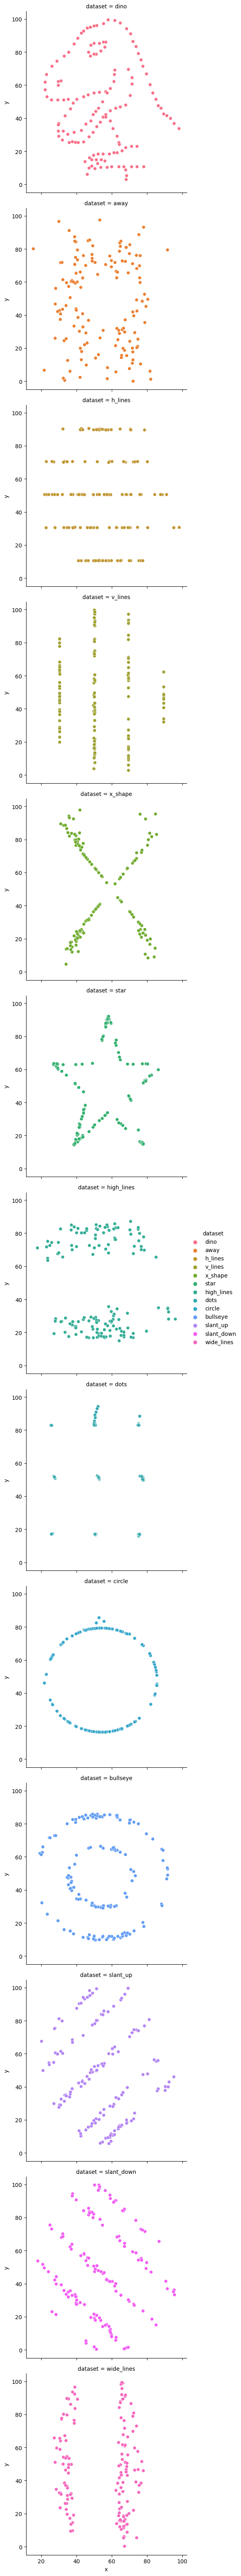

In [72]:
sns.relplot(x="x", y="y", hue="dataset", row="dataset", data=df_points);

Após a análise gráfica, fica claro que esses conjuntos são muito diferentes. Cada conjunto possui uma distribuição diferente de pontos no plano, mostrando diferentes padrões e comportamentos.

## Referências (Spoiler Alert!)

Os dados de algumas questões foram obtidos em https://www.research.autodesk.com/publications/same-stats-different-graphs/. Para não estragar a surpresa, sugiro consultar essa referência apenas após tentar resolver as questões. De toda forma, as respostas das perguntas não estão contidas na página citada.